# Using Machine Learning Tools: Workshop 1

**Chapter 1 – The Machine Learning landscape**

This is a cut down version of the code accompanying Chapter 1 of 
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

All code for the book is available at https://github.com/ageron/handson-ml2

--------------------------------------------------------------------

First check we have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Code example
import numpy as np
import pandas as pd
import sklearn.linear_model

In [5]:
# Load the data using a pandas function
housing_stats = pd.read_csv("workshop2.csv")

In [6]:
housing_stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [7]:
##show the infront 5 rows
housing_stats.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [8]:
## Show the information of the datas
housing_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [9]:
## Describe the datas
housing_stats.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.648344,28.656928,537.870553,1425.379942,499.539680,3.870623,206855.816909
std,2.003532,3.200177,12.848021,421.385070,1132.583966,382.329753,1.899920,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,378.000000,400.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# np.unique(housing_stats['ocean_proximity'])

In [11]:
## Remove the ocean_proximity
## axis 1 == rows
newDF = housing_stats.drop("ocean_proximity", axis = 1)

In [12]:
newDF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [13]:
##Another method

# newDF_ver2 = housing_stats("ocean_proximity", axis = 1, inplace = True)

In [14]:
housing_stats['total_rows'] = pd.to_numeric(housing_stats['total_rooms'], errors = "coerce")

In [15]:
housing_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  total_rows          19622 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


In [16]:
housing_stats = housing_stats.dropna()

In [17]:
housing_stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rows
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,880.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,7099.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,1467.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1274.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,1627.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,1665.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,697.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,2254.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,1860.0


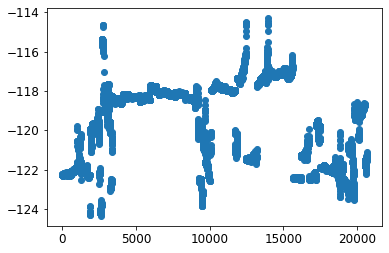

In [18]:
plt.plot(housing_stats['longitude'], 'o')

In [19]:
housing_stats.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rows'],
      dtype='object')

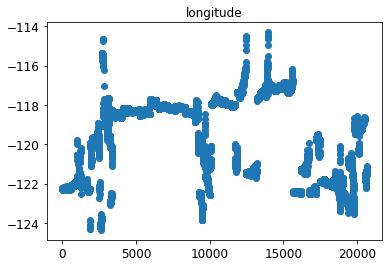

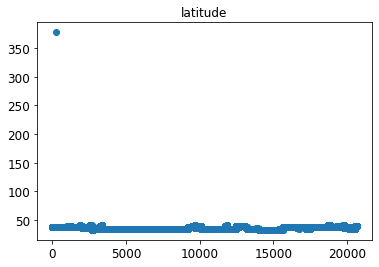

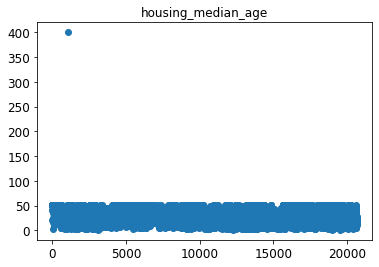

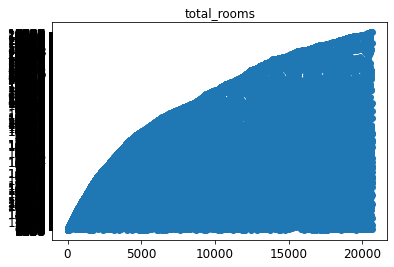

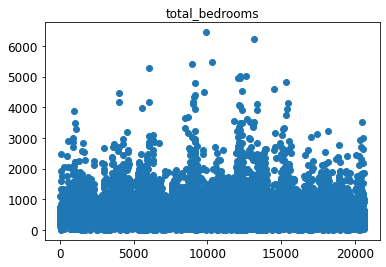

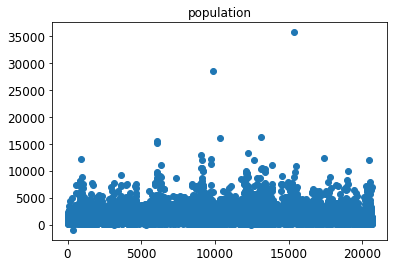

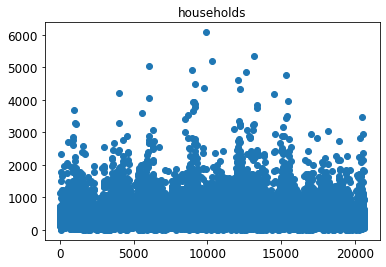

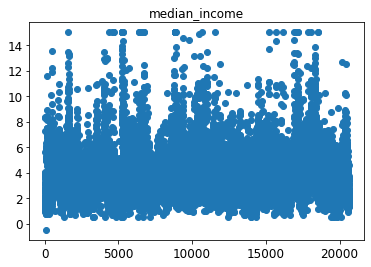

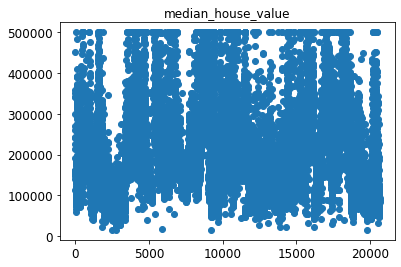

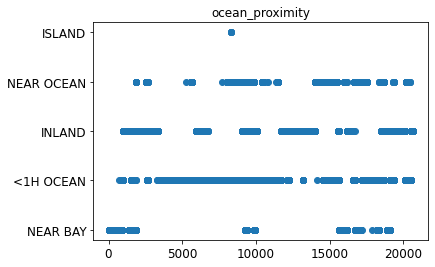

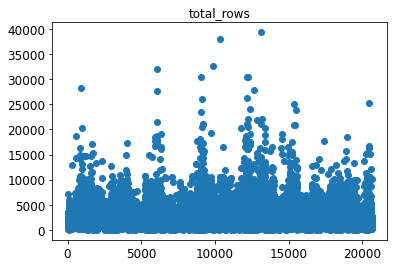

In [20]:
for col in housing_stats.columns:
    plt.plot(housing_stats[col], 'o')
    plt.title(col)
    plt.show()

In [21]:
housing_stats.loc[housing_stats['latitude'] > 350 ,'latitude'] = np.nan

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


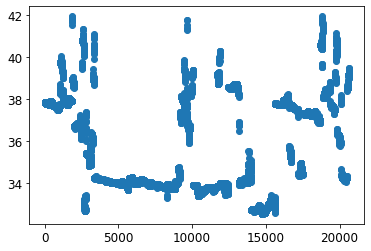

In [22]:
plt.plot(housing_stats['latitude'], 'o')

In [23]:
housing_stats = housing_stats.dropna()

In [24]:
housing_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19425 non-null  float64
 1   latitude            19425 non-null  float64
 2   housing_median_age  19425 non-null  int64  
 3   total_rooms         19425 non-null  object 
 4   total_bedrooms      19425 non-null  float64
 5   population          19425 non-null  int64  
 6   households          19425 non-null  int64  
 7   median_income       19425 non-null  float64
 8   median_house_value  19425 non-null  int64  
 9   ocean_proximity     19425 non-null  object 
 10  total_rows          19425 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.8+ MB


In [25]:
y = housing_stats['median_house_value']
x = housing_stats.iloc[:, 0 : 0]

In [26]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 19425, dtype: int64

In [27]:
x

""
0
1
2
3
4
...
20635
20636
20637
20638


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
linear

linear.fit(X_train, y_train)
linear.predict(X_test)

NameError: name 'linear' is not defined

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>